<a href="https://colab.research.google.com/github/rheannlv/MLA_RLV/blob/main/MLA4_RLV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rheann Vera

CS-430-ON

Machine Learning Assignment #4

Problem 1

**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [32]:
from sklearn import tree
from sklearn.tree import export_text

In [3]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error

from sklearn import set_config
set_config(display='diagram')

In [18]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

**Acquire Data**

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

**Splitting Data into Train and Test**

In [7]:
X = df[['variance', 'skewness', 'curtosis', 'entropy']]
y = df['forgery']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

**Building the Pipeline**

In [9]:
num_attribs = ['variance', 'skewness', 'curtosis', 'entropy']

In [10]:
col_transform = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), num_attribs)
], remainder='passthrough')

In [11]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('decision_tree',tree.DecisionTreeClassifier(max_depth=5))
                     ])

**Executing the Model**

In [12]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('decision_tree', DecisionTreeClassifier(max_depth=5))])

**Evaluating the Model**

In [13]:
y_pred = pipeline.predict(X_test)

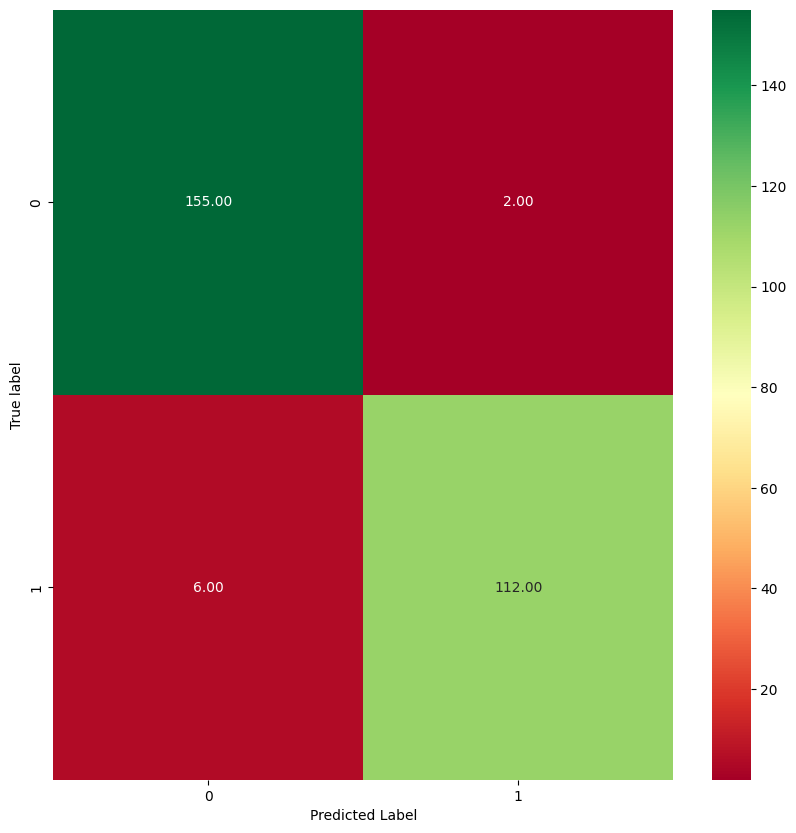

In [20]:
plot_cm(y_test,y_pred)

In [21]:
print("Precision: ", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))

Precision:  0.9824561403508771
Recall: 0.9491525423728814
F1 Score: 0.9655172413793103



**Conclusion**

This model works well with this data, precision, recall and F1 are nearly perfect scores.

Problem 2


**Acquire Data**

In [22]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

In [23]:
df.rename(columns={'Usage_kWh':'useage_kwh', 'Lagging_Current_Reactive.Power_kVarh': 'lag_react_pwr_kvarh', 'Leading_Current_Reactive_Power_kVarh': 'lead_react_pwr_kvarh',
                   'Lagging_Current_Power_Factor':'lag_current_pwr','Leading_Current_Power_Factor':'lead_current_pwr', 'NSM':'nsm', 'WeekStatus':'week_status', 'Day_of_week':'day_of_week', 'Load_Type':'load_type'},inplace=True)

**Spltting Data into Train/Test**

In [25]:
X = df[['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'lag_current_pwr', 'lead_current_pwr', 'nsm', 'week_status', 'day_of_week', 'load_type', 'CO2(tCO2)']]
y = df[['useage_kwh']]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

**Building the Pipeline**

In [27]:
num_attribs = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm']
cat_attribs = ['week_status', 'day_of_week', 'load_type']

In [28]:
col_transform = ColumnTransformer(transformers=[
    ('cat',OneHotEncoder(), cat_attribs),
    ('num',MinMaxScaler(), num_attribs),
], remainder='passthrough')

In [33]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('decision_tree',tree.DecisionTreeRegressor(max_depth=5))
                     ])

**Executing the Model**

In [34]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('decision_tree', DecisionTreeRegressor(max_depth=5))])

**Evaluating the Model**

In [35]:
y_pred = pipeline.predict(X_test)

In [36]:
y_pred_train = pipeline.predict(X_train)

In [37]:
print(mean_squared_error(y_test, y_pred)**(0.5))
print(mean_squared_error(y_train,y_pred_train)**(0.5))

3.579982636465033
3.5420700062120885


**Conclusion**

This model works well with this data. Based on the RMSE, both train and test have low numbers.